# 1. Import Packages

In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from deproject import deproject, get_galaxy_specs
from astropy.coordinates import SkyCoord

# 2. Open `.fits` File

In [2]:
# open fits file
hdu_galaxy = fits.open('/home/austin/PHANGS/ngc1300/ngc1300_w1_mjysr.fits')[0]

# set up coordinate grid for data in fits file
wcs_im1 = WCS(hdu_galaxy.header)

In [3]:
hdu_galaxy.header

SIMPLE  =                    T / Written by IDL:  Sat Jun 18 09:13:28 2022      
BITPIX  =                  -64 /  IEEE double precision floating point          
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  655 / length of data axis 1                          
NAXIS2  =                  655 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'RA---TAN'           / TANgent plane                                  
CTYPE2  = 'DEC--TAN'           / TANgent plane                                  
CRVAL1  =            49.920815 / Reference RA                                   
CRVAL2  =           -19.411114 / Reference Dec                                  
CRPIX1  =                 32

# 4. Display `.fits` Image

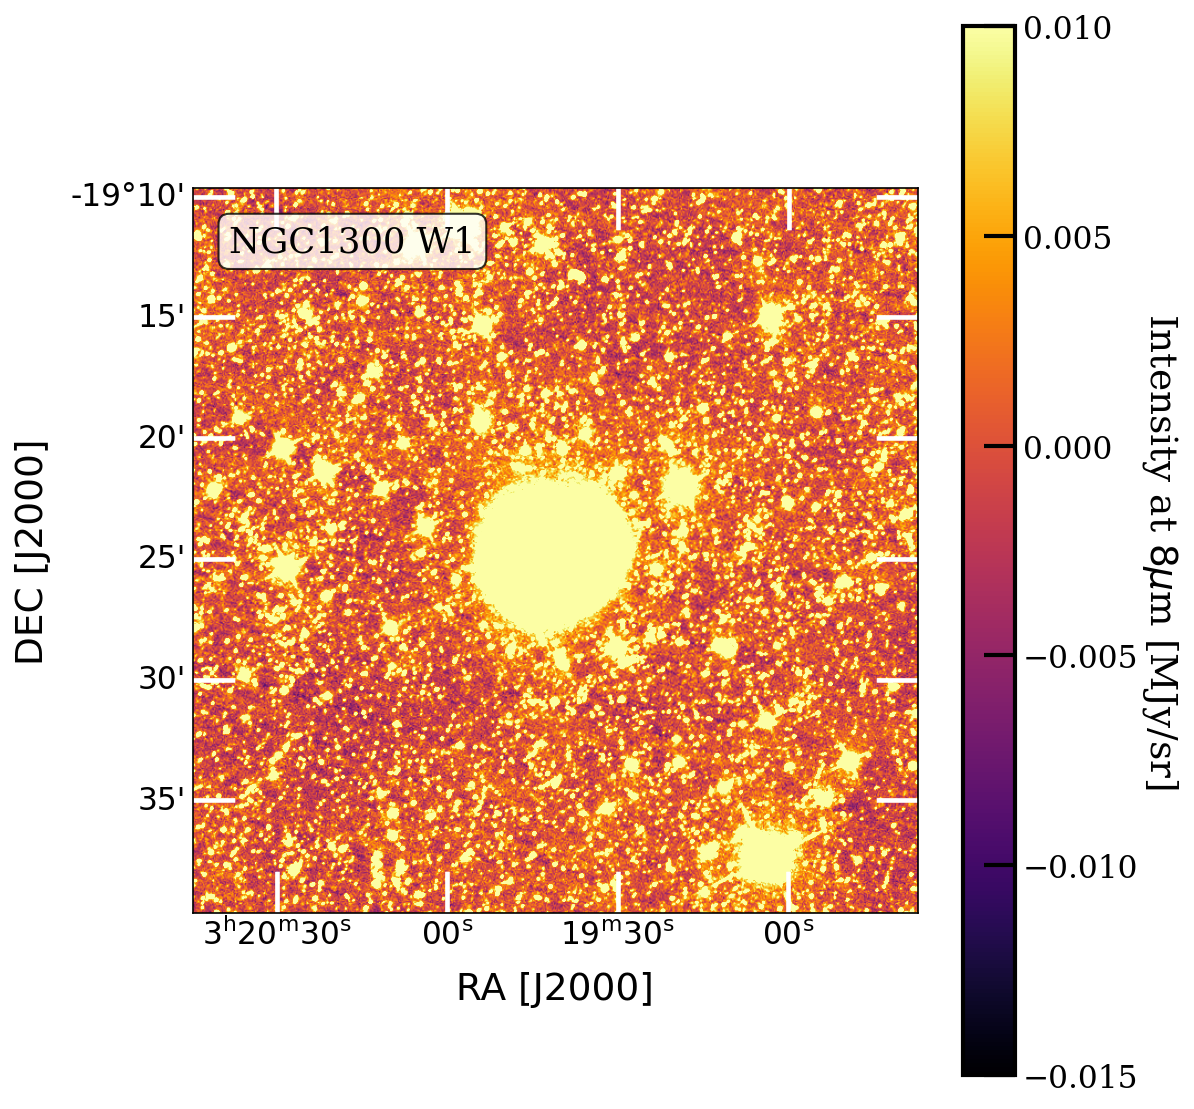

In [4]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot(projection=wcs_im1)

# display fits image
im = ax.imshow(hdu_galaxy.data, origin='lower', norm=mpl.colors.Normalize(vmin=-0.015, vmax=0.01), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, 'NGC1300 W1', transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()


# 3. Struggle to make a histrogram

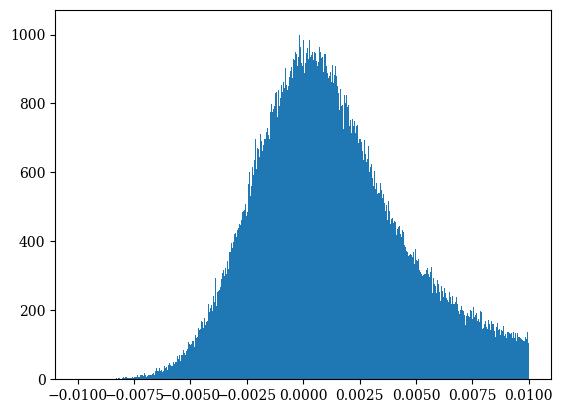

In [5]:
#ngc 1300 W1
ngc1300w1_data = fits.getdata('/home/austin/PHANGS/ngc1300/ngc1300_w1_mjysr.fits')
#define bins
bins1300w1 = np.linspace(-0.01, 0.01, 1000)
# Make histogram
histogram = plt.hist(ngc1300w1_data.flatten(), bins=bins1300w1)

# Fit a guassian curve to the histogram

def gaussian(ngc1300w1_data, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (ngc1300w1_data - mean)**2 / (2*standard_deviation ** 2))
    
x = np.random.normal(10, 5, size=10000)

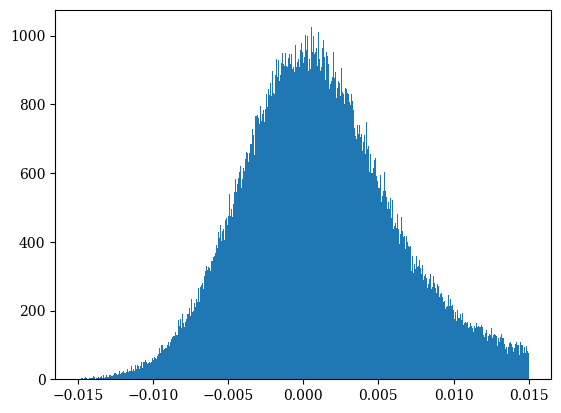

In [6]:
#ngc 1300 W2
ngc1300w2_data = fits.getdata('/home/austin/PHANGS/ngc1300/ngc1300_w2_mjysr.fits')
#define bins
bins1300w2 = np.linspace(-0.015, 0.015, 1000)

# Make histogram
histogram = plt.hist(ngc1300w2_data.flatten(), bins=bins1300w2)

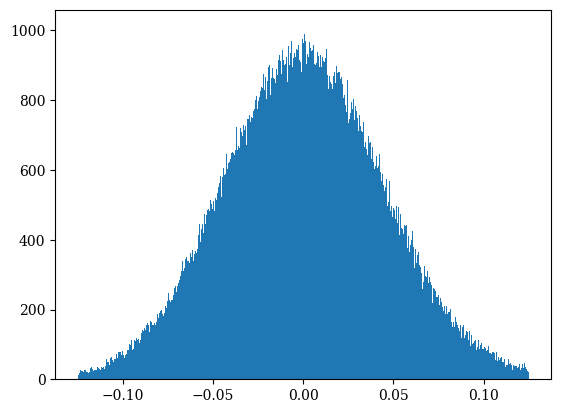

In [7]:
#ngc 1300 W3
ngc1300w3_data = fits.getdata('/home/austin/PHANGS/ngc1300/ngc1300_w3_mjysr.fits')
#define bins
bins1300w3 = np.linspace(-0.125, 0.125, 1000)
# Make histogram
histogram = plt.hist(ngc1300w3_data.flatten(), bins=bins1300w3)

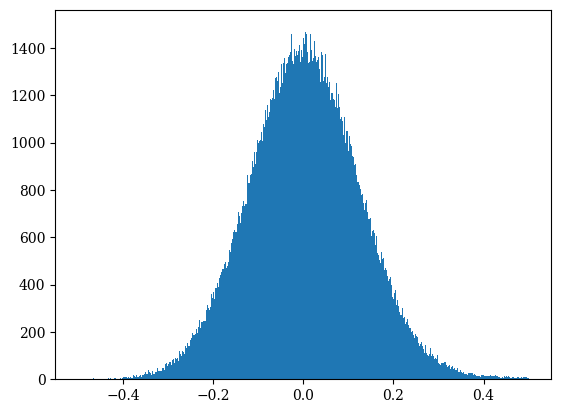

In [8]:
#ngc 1300 W4
ngc1300w4_data = fits.getdata('/home/austin/PHANGS/ngc1300/ngc1300_w4_mjysr.fits')
#define bins
bins1300w4 = np.linspace(-0.5, 0.5, 1000)
#be silly and make the bins logarithmic log_bins = np.logspace()
# Make histogram
histogram = plt.hist(ngc1300w4_data.flatten(), bins=bins1300w4)
# be silly and make it on a log scale if you want with plt.yscale('log')